In [1]:
%matplotlib inline
from utils import *

# BLUF - Bottom Line Up Front

Clustering using CyberActivd graph embedding was mostly sucessful. 

For each graph type - YouTube, GMail, VGame, Attack, Download, and CNN - the top content of each cluster consists of one uniform type of subgraphs. 

# StreamSpot Dataset
Tab-separated file with one edge on each line in the following format:

```source-id	source-type	destination-id	destination-type	edge-type	graph-id```

Graph ID's correspond to scenarios as follows:

- YouTube (graph ID's 0 - 99)
- GMail (graph ID's 100 - 199)
- VGame (graph ID's 200 - 299)
- Drive-by-download attack (graph ID's 300 - 399)
- Download (graph ID's 400 - 499)
- CNN (graph ID's 500 - 599)

# CyberActive Graph Embedding

As we saw in the analysis there are different types of graphs.
In order to identify similarity in dynamic graphs it is important to account for both
- spatial closeness of different nodes
- temporal closseness of different nodes

Embeddings of 2 nodes that have great overal in their neighbor nodes should be similar. Closeness in time should also influence the embeddings of 2 nodes to make them more similar. 

One more thing is that we are developing an approach to create graph embedding for dynamic graph. The building blocks are subgraphs created from nodes and edges corresponding to a fairly small, predefined, time slice. 

First, we convert the cvs data into a sequence of <b>node_edge_node</b> triples.


For example, the following table 

| source_id	|source_type	|destination_id	|destination_type	|edge_type	|graph_id| 
| --- | --- | --- | --- | --- | --- |
| 4	| b	| 77	| c	| u	| 0| 
| 4	| a	| 77	| f	| v	| 0| 
| 4	| a	| 0	| d	| t	| 0| 

is encoded as a sentence of three words:

<b>"b_u_c  &emsp; a_v_f   &emsp; a_t_d"</b>

The node and edge names were mapped to single letter by the [authors](https://github.com/sbustreamspot/sbustreamspot-data) according to the map below. These three words using the map are translated as:

<b>b_u_c</b> = ```thread open file```

<b>a_v_f</b> = ```process read stdin```

<b>a_t_d</b> = ```process mmap2  file```

In [2]:
print_dict(node_edge_map, 6)

<b>a: &nbsp;process&emsp; &emsp;&emsp;&emsp;b: &nbsp;thread&emsp; &emsp;&emsp;&emsp;c: &nbsp;file&emsp; &emsp;&emsp;&emsp;d: &nbsp;MAP_ANONYMOUS&emsp; &emsp;&emsp;&emsp;e: &nbsp;NA&emsp; &emsp;&emsp;&emsp;f: &nbsp;stdin&emsp; &emsp;&emsp;&emsp;</b>

<b>g: &nbsp;stdout&emsp; &emsp;&emsp;&emsp;h: &nbsp;stderr&emsp; &emsp;&emsp;&emsp;i: &nbsp;accept&emsp; &emsp;&emsp;&emsp;j: &nbsp;access&emsp; &emsp;&emsp;&emsp;k: &nbsp;bind&emsp; &emsp;&emsp;&emsp;l: &nbsp;chmod&emsp; &emsp;&emsp;&emsp;</b>

<b>m: &nbsp;clone&emsp; &emsp;&emsp;&emsp;n: &nbsp;close&emsp; &emsp;&emsp;&emsp;o: &nbsp;connect&emsp; &emsp;&emsp;&emsp;p: &nbsp;execve&emsp; &emsp;&emsp;&emsp;q: &nbsp;fstat&emsp; &emsp;&emsp;&emsp;r: &nbsp;ftruncate&emsp; &emsp;&emsp;&emsp;</b>

<b>s: &nbsp;listen&emsp; &emsp;&emsp;&emsp;t: &nbsp;mmap2&emsp; &emsp;&emsp;&emsp;u: &nbsp;open&emsp; &emsp;&emsp;&emsp;v: &nbsp;read&emsp; &emsp;&emsp;&emsp;w: &nbsp;recv&emsp; &emsp;&emsp;&emsp;x: &nbsp;recvfrom&emsp; &emsp;&emsp;&emsp;</b>

<b>y: &nbsp;recvmsg&emsp; &emsp;&emsp;&emsp;z: &nbsp;send&emsp; &emsp;&emsp;&emsp;A: &nbsp;sendmsg&emsp; &emsp;&emsp;&emsp;B: &nbsp;sendto&emsp; &emsp;&emsp;&emsp;C: &nbsp;stat&emsp; &emsp;&emsp;&emsp;D: &nbsp;truncate&emsp; &emsp;&emsp;&emsp;</b>

<b>E: &nbsp;unlink&emsp; &emsp;&emsp;&emsp;F: &nbsp;waitpid&emsp; &emsp;&emsp;&emsp;G: &nbsp;write&emsp; &emsp;&emsp;&emsp;H: &nbsp;writev&emsp; &emsp;&emsp;&emsp;</b>

We can think of the triples as words, and sequences of such triples as sentences. 

We use ```gensim``` package and specifically Doc2Vec functionality to convert each word and ultimately the whole sentence into an embedding of a predefined size. 

Here are the processing steps implemented in the function ```process_data``` in ```utils.py```:

For each graph type (YouTube, GMail, VGame, Attack, Download, and CNN)
1. Read data for one ```graph_id```
2. Chunk the graph into subgraphs of 100 rows
3. Convert the csv data to sentences of triples
4. Train a Doc2Vec model using ```gensim``` package; convert each sentence into a vector of predefined size
5. Perform clustering of the sentence-vectors using ```KMeans``` from ```scikit-learn```
6. Visualize the subgraphs with the highest ```silhoutte``` score

Silhoutte score measures the quality of clustering. To quote this [wikipedia article](https://en.wikipedia.org/wiki/Silhouette_(clustering):
The silhouette value is a measure of how similar an object is to its own cluster  compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [17]:
n_components = 3
number_graphs = 24
display_config = (8,3)
display(Markdown('# For one graph from each graph type: YouTube, GMail, VGame, Attack, Download, and CNN'))
display(Markdown('### ' + 'Cluster the subgraphs into ' + str(n_components) + ' clusters' ))
display(Markdown('### ' + 'For each cluster display the top ' + str(number_graphs) + ' subgraphs' ))

# For one graph from each graph type: YouTube, GMail, VGame, Attack, Download, and CNN

### Cluster the subgraphs into 3 clusters

### For each cluster display the top 24 subgraphs

## One Graph From YouTube

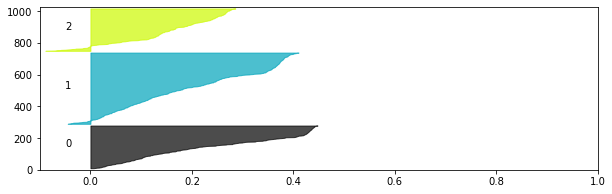

Wall time: 49.1 s


In [18]:
%%time
graph_id = 51
graph_type = 'YouTube'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data(graph_id, n_components, epochs = 100)

### YouTube Cluster  0

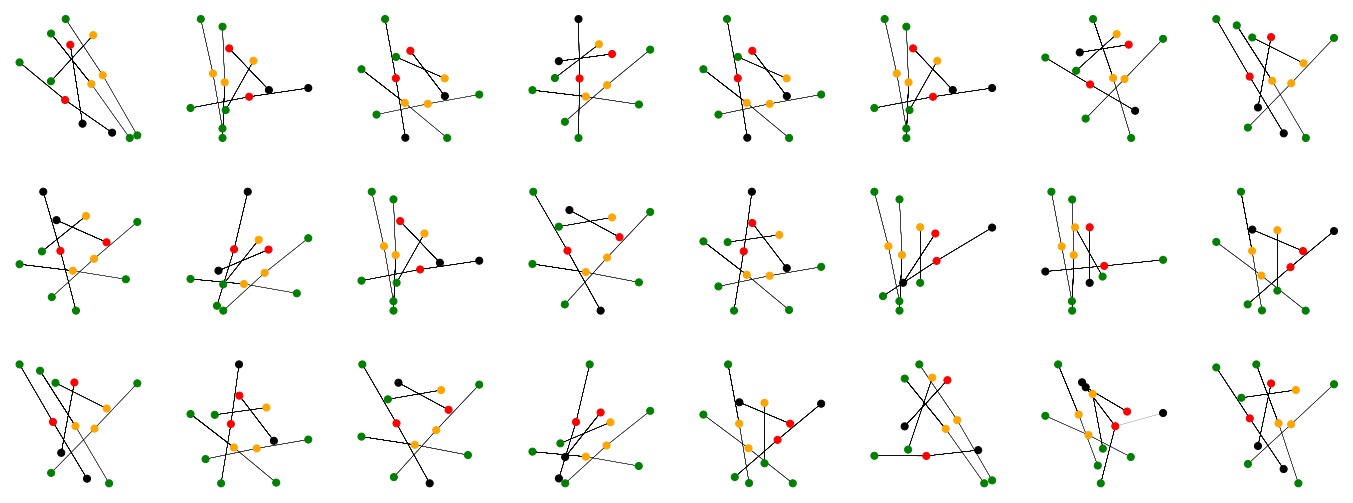

### YouTube Cluster  1

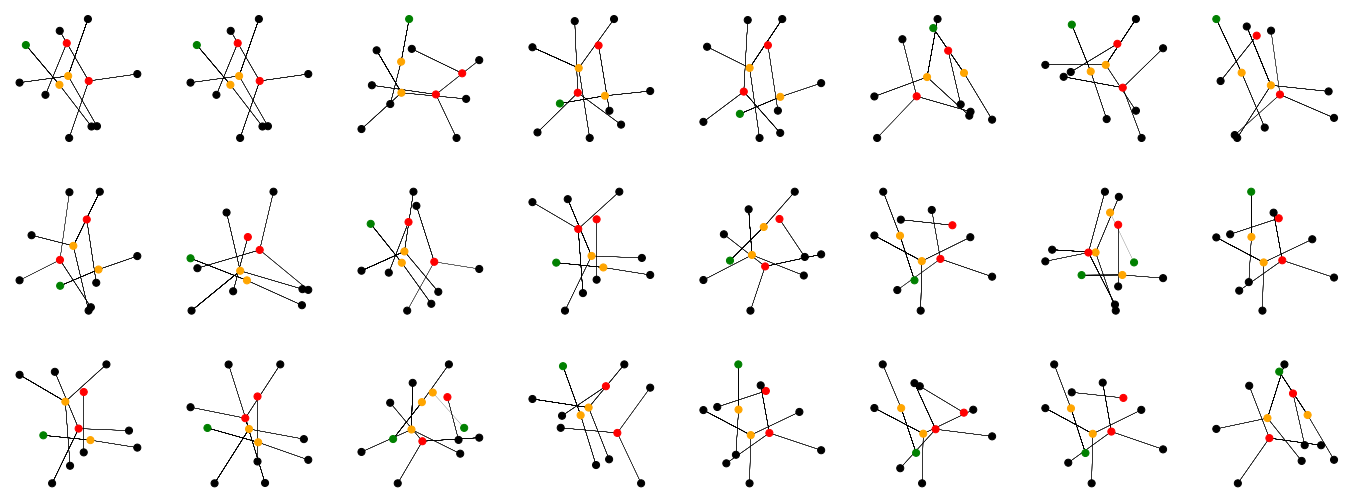

### YouTube Cluster  2

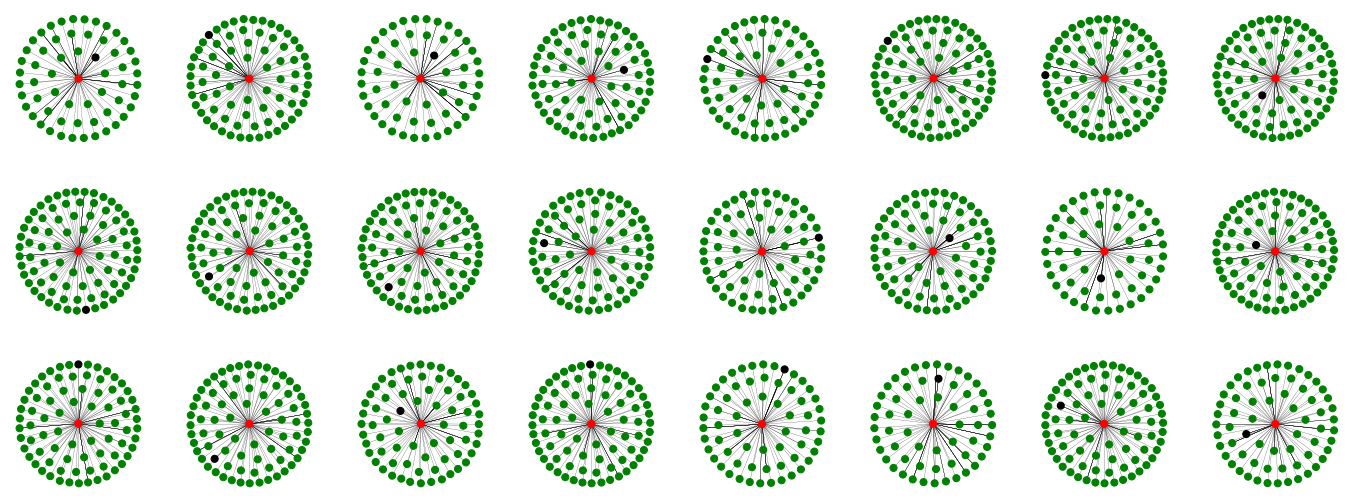

In [19]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster  ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)

## One Graph From GMail

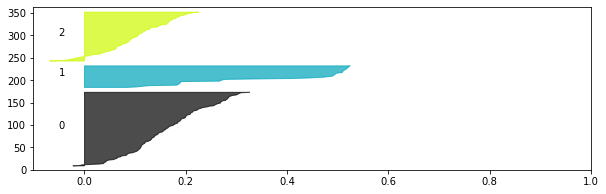

Wall time: 18.8 s


In [20]:
%%time
graph_id = 180
graph_type = 'GMail'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data(graph_id, n_components, epochs = 100)

### GMail Cluster  0

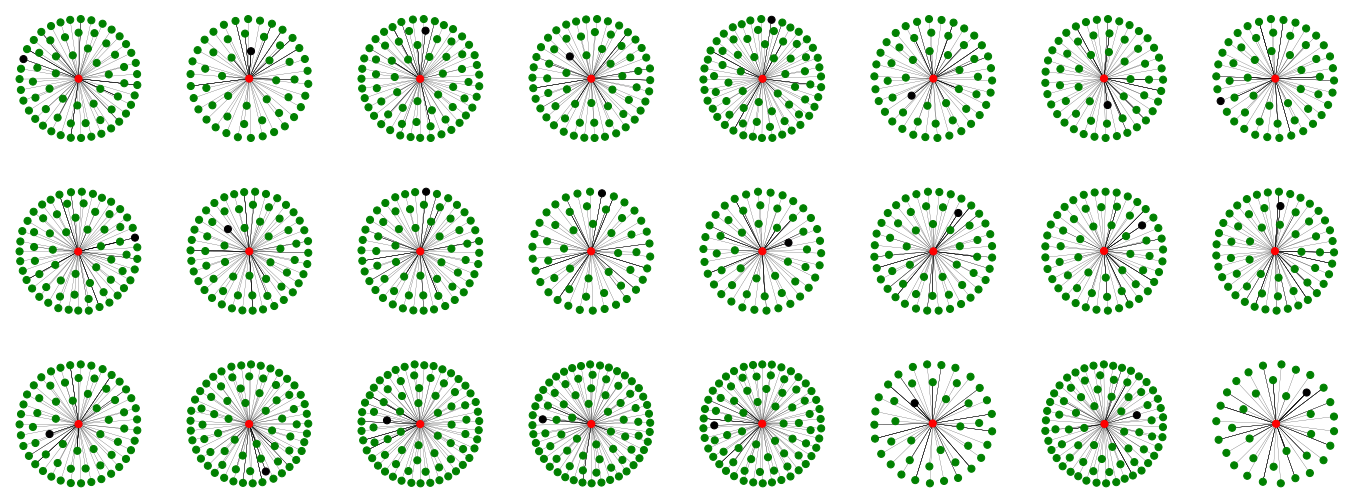

### GMail Cluster  1

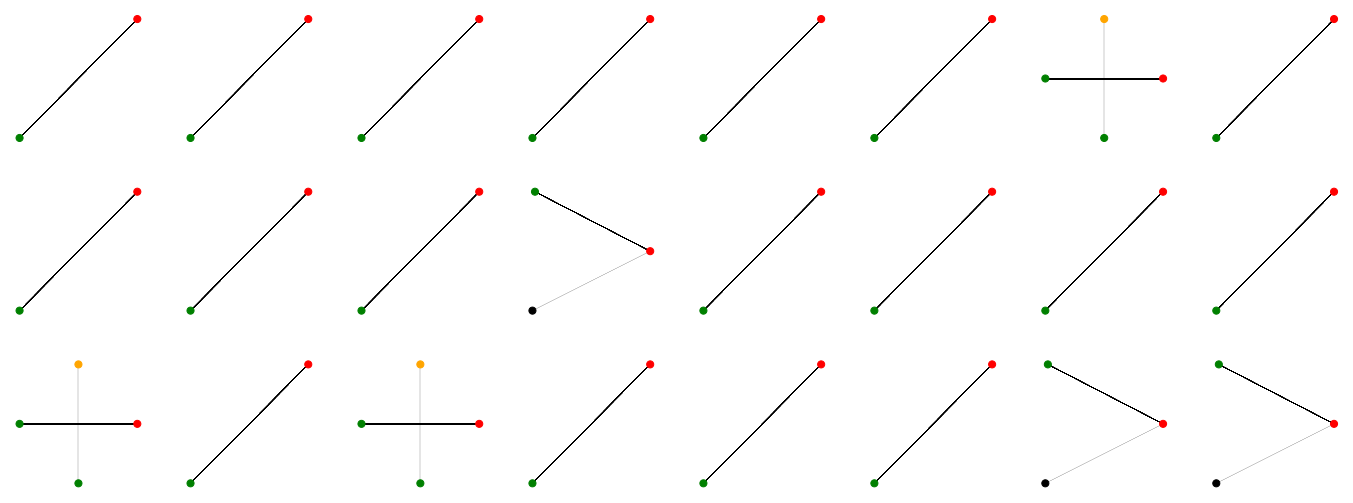

### GMail Cluster  2

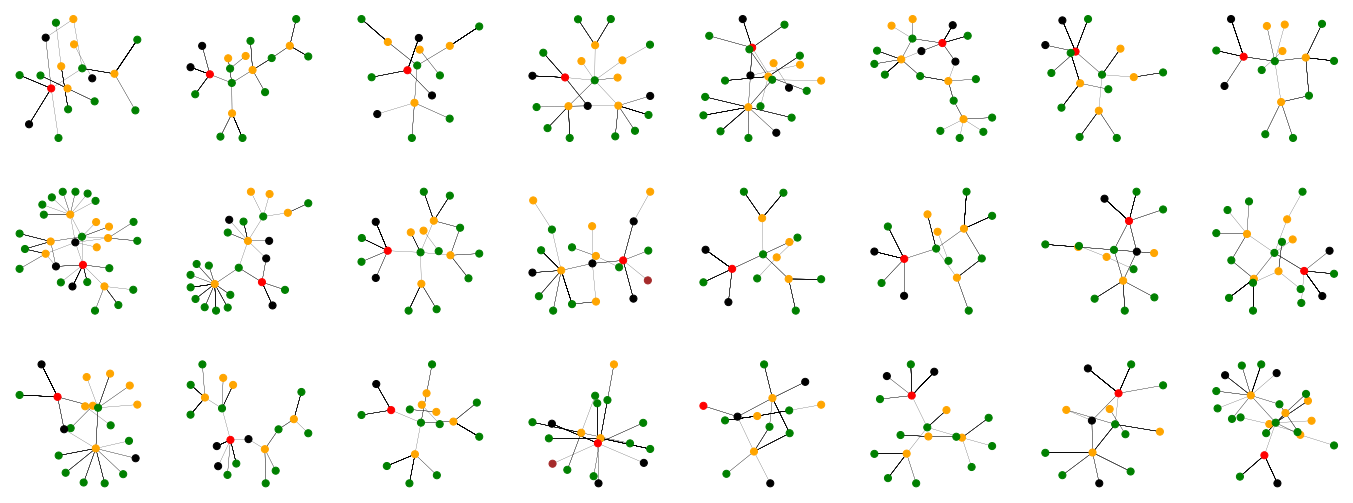

In [21]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster  ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)

## One Graph From VGame

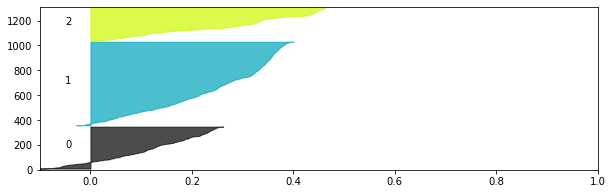

Wall time: 56.2 s


In [22]:
%%time
graph_id = 251
graph_type = 'VGame'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data(graph_id, n_components, epochs = 100)

### VGame Cluster  0

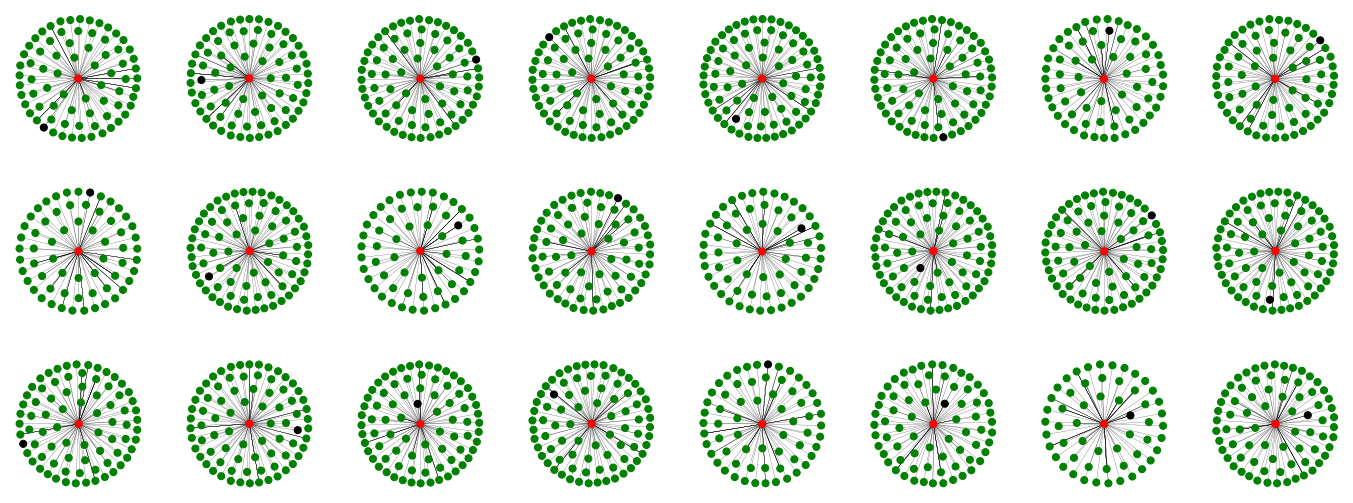

### VGame Cluster  1

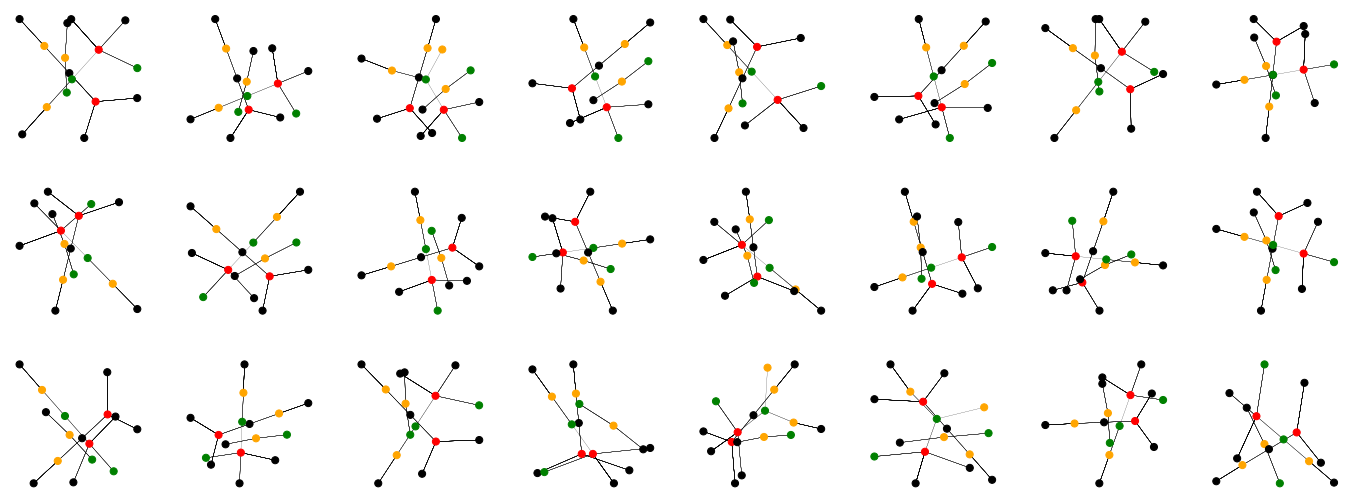

### VGame Cluster  2

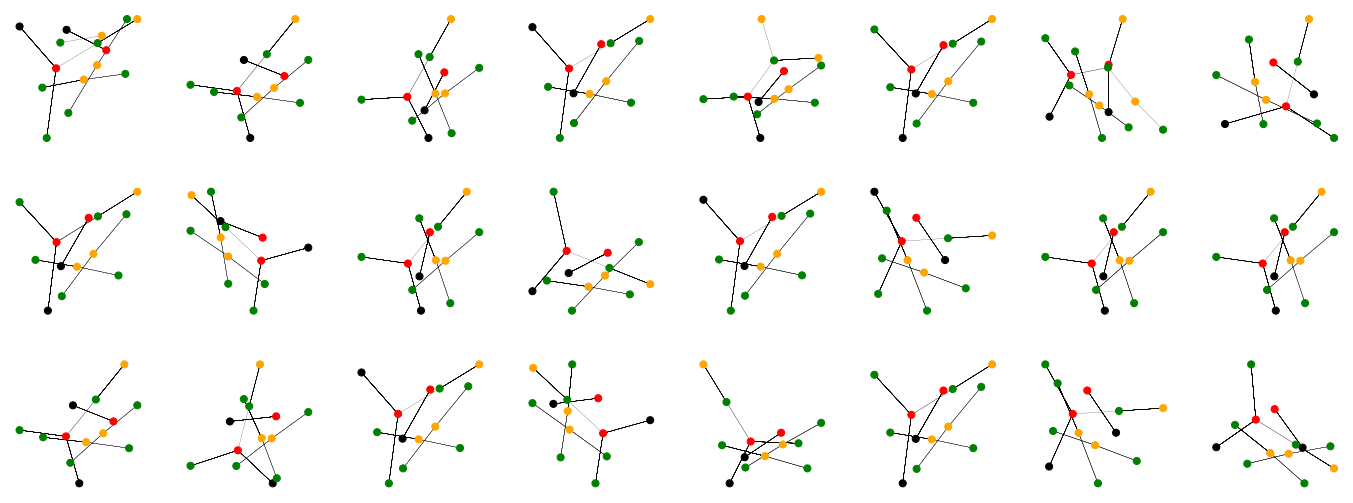

In [23]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster  ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)

## One Graph From Attack

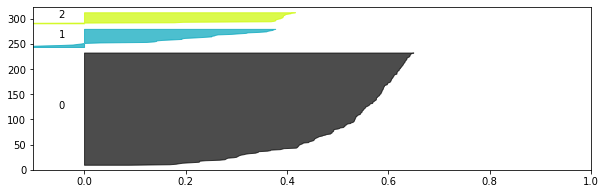

Wall time: 16.1 s


In [24]:
%%time
graph_id = 301
graph_type = 'Attack'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data(graph_id, n_components, epochs = 10)

### Attack Cluster  0

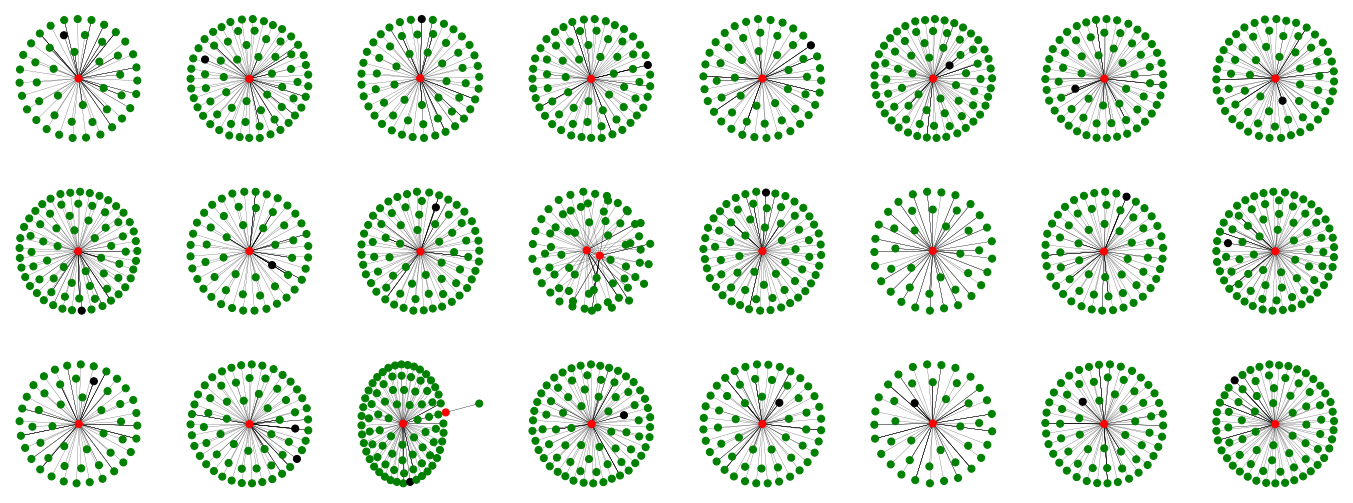

### Attack Cluster  1

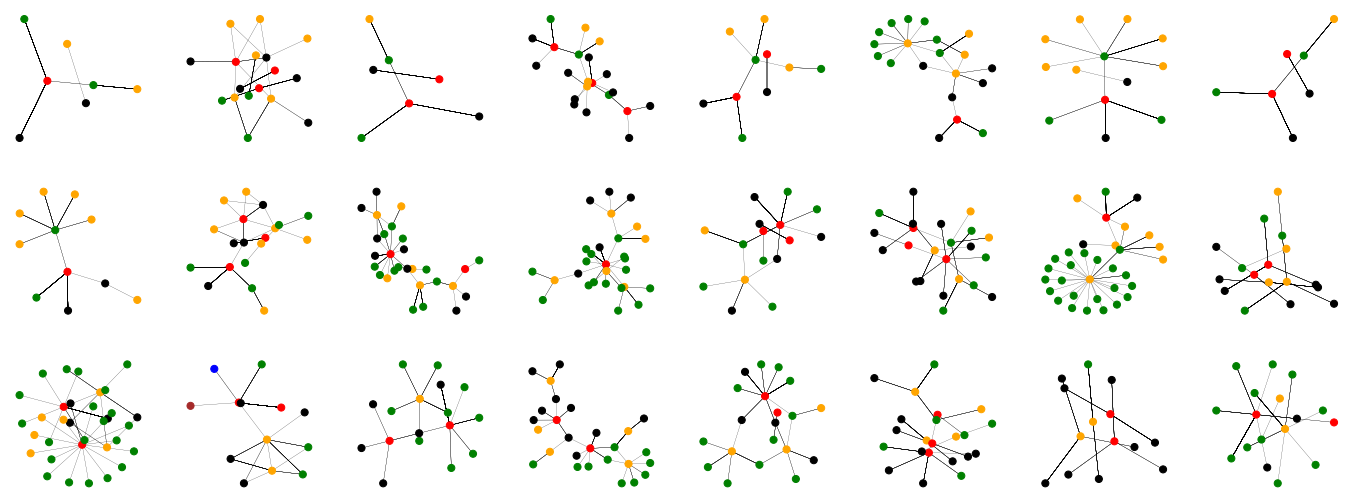

### Attack Cluster  2

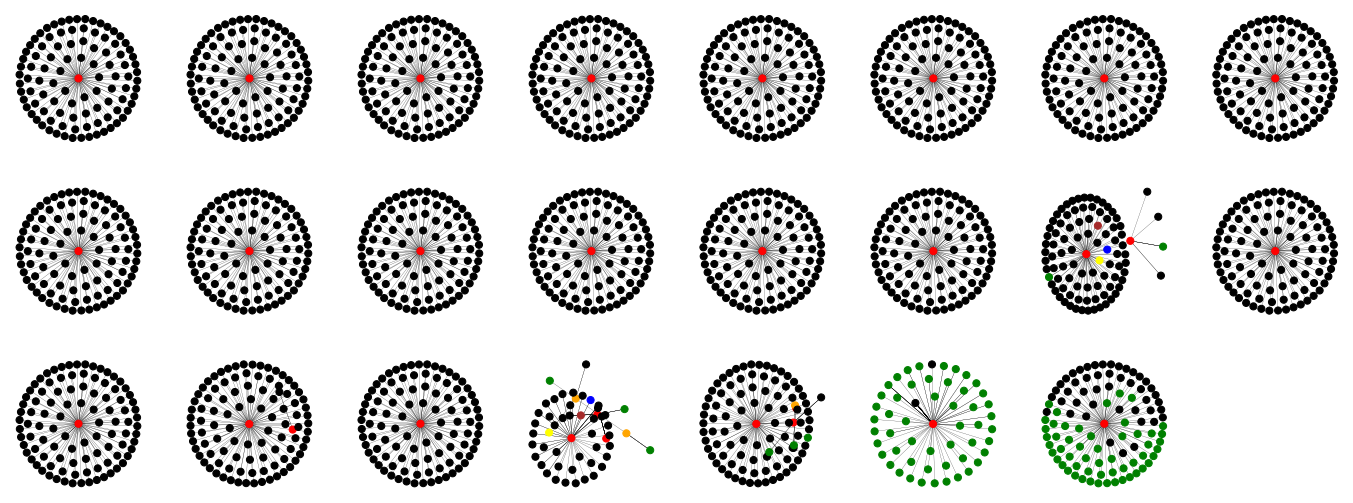

In [25]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster  ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)

## One Graph From Download

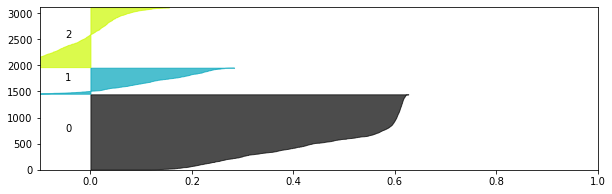

Wall time: 2min 8s


In [26]:
%%time
graph_id = 450
graph_type = 'Download'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data(graph_id, n_components, epochs = 100)

### Download Cluster  0

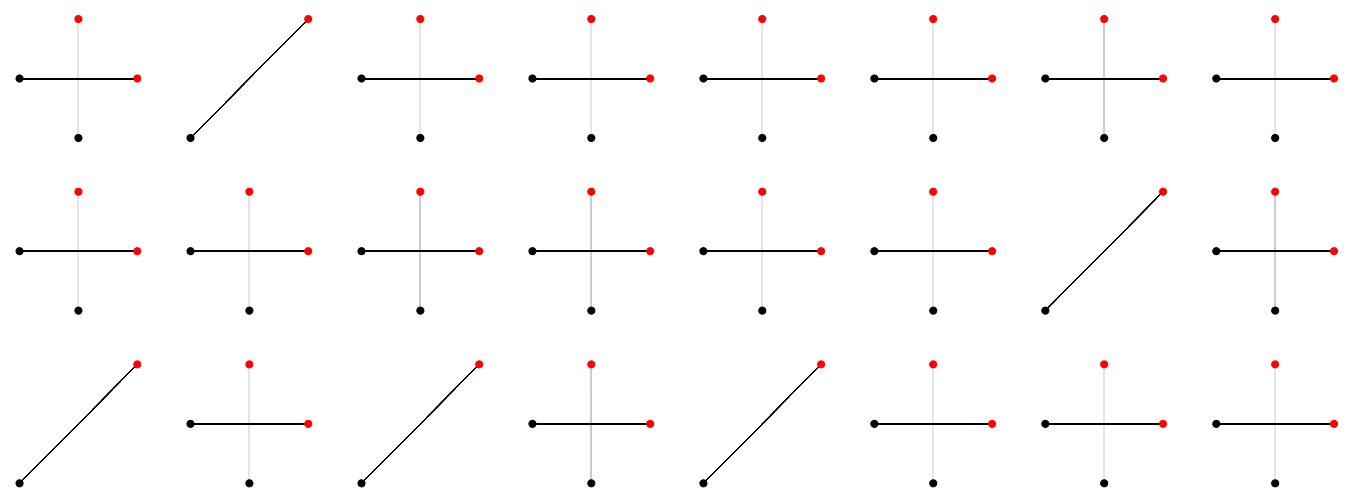

### Download Cluster  1

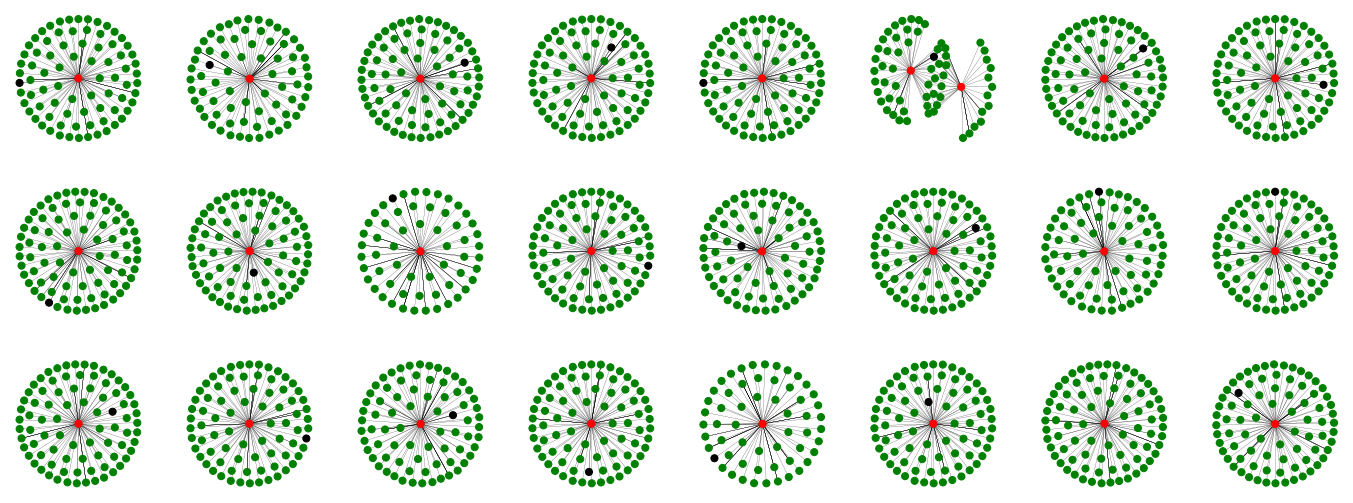

### Download Cluster  2

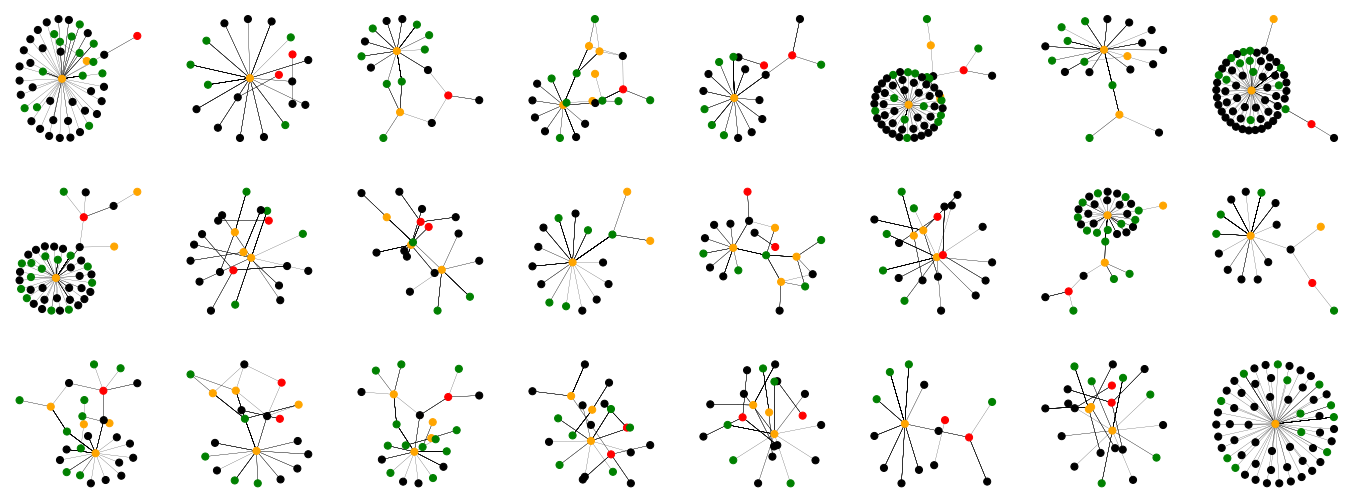

In [27]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster  ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)

## One Graph From CNN

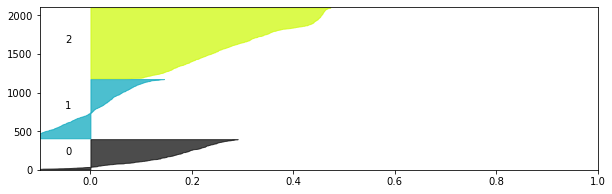

Wall time: 1min 25s


In [28]:
%%time
graph_id = 551
graph_type = 'CNN'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data(graph_id, n_components, epochs = 100)

### CNN Cluster 0

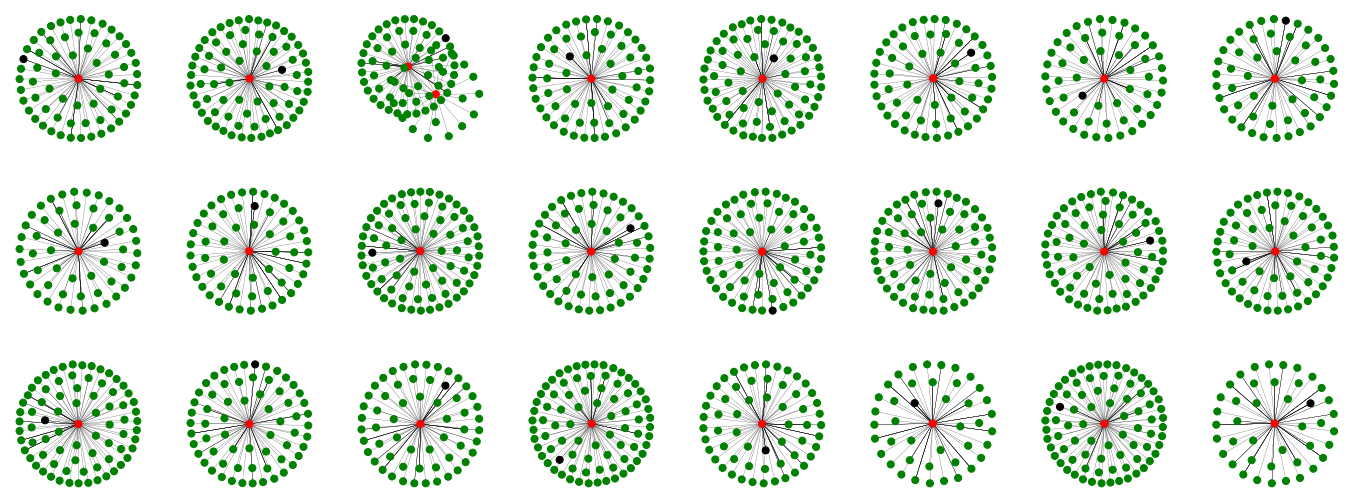

### CNN Cluster 1

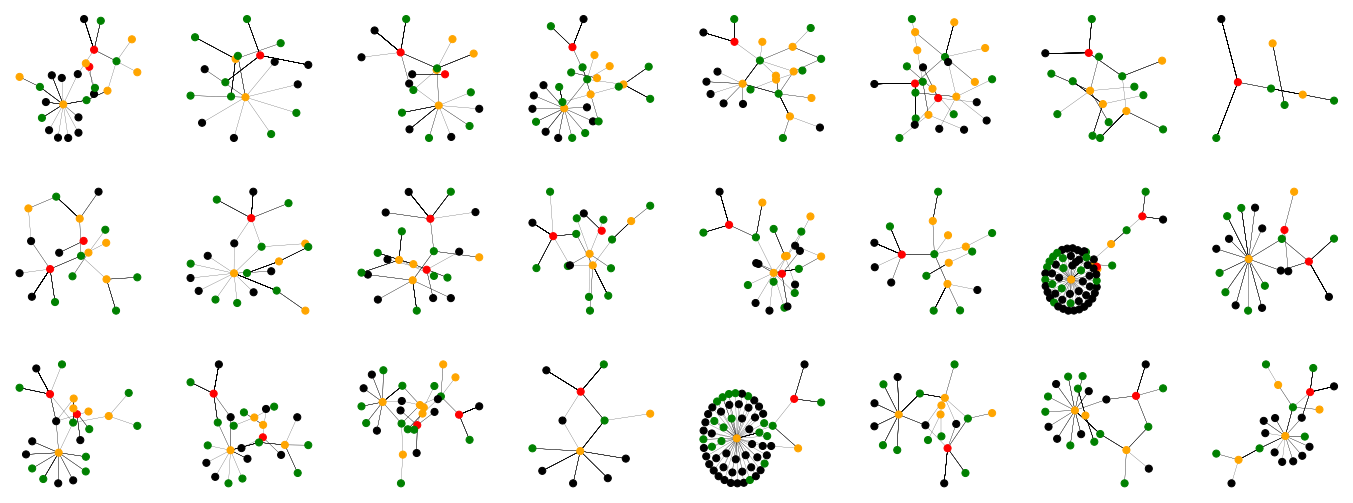

### CNN Cluster 2

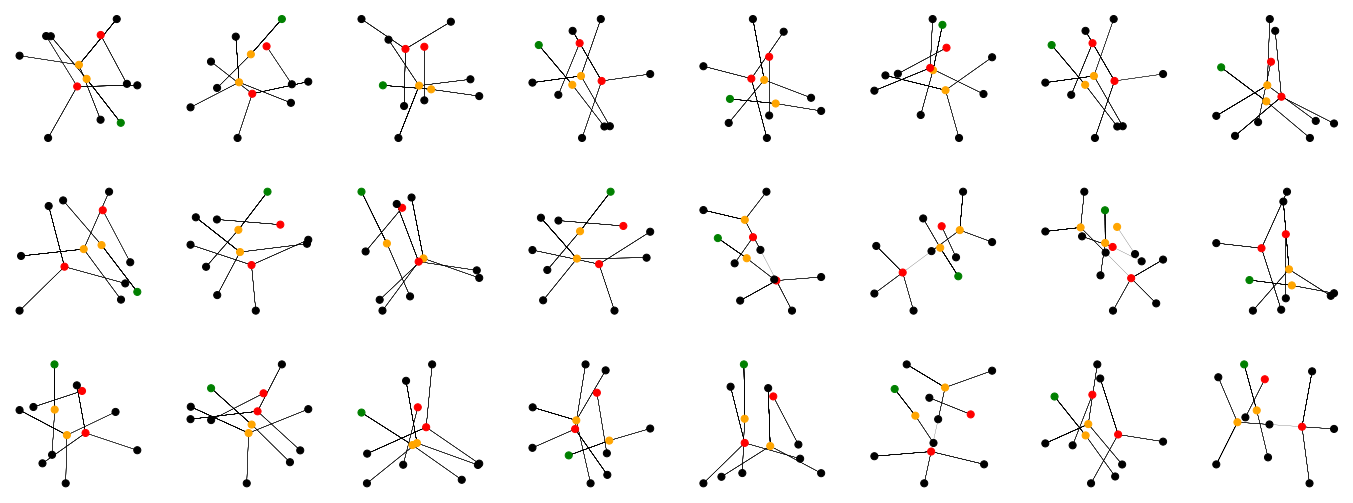

In [29]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)